In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Guvi_collab/Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000



**Feature Scaling**



In [ ]:
#Encode the variable Gender in order to fit that into data
lc=LabelEncoder()
df['Gender']=lc.fit_transform(df[['Gender']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#will scale the salary column using standard scaler, according to the range equivalent to AGE .
STS=StandardScaler()
df[['EstimatedSalary','Age']]=STS.fit_transform(df[['EstimatedSalary','Age']])

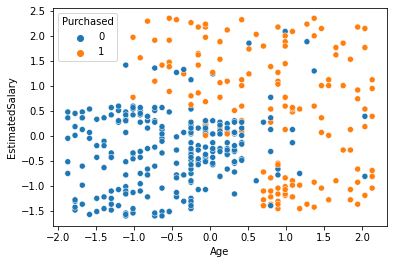

In [ ]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])

**Splitting the dataset into the Training set and Test set**

In [ ]:
x=df.drop(['User ID','Purchased'],axis=1) #since the requirement here is to build a model with independant variables as salary, AGE and GENDER
y=df['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30) 

**Fitting K-NN to the Training set**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Predicting the Test set results**

In [ ]:
predicted_ytest=knn.predict(x_test)
predicted_ytrain=knn.predict(x_train) # predicting for training dataset too. To compare the fit between the test and training


**Making the Confusion Matrix**

In [ ]:
#confusion matrix for test dataset
CM=confusion_matrix(y_test,predicted_ytest)
print(CM)

[[65  4]
 [ 7 44]]


confusion matrix results for test 
*   TRUE POS =  65
*   FALSE POS = 7
*   FALSE NEG = 4
*   TRUE NEG  = 44



In [ ]:
#confusion matrix for training dataset
CM_train=confusion_matrix(y_train,predicted_ytrain)
print(CM_train)

[[176  12]
 [  6  86]]


confusion matrix results for train 
*   TRUE POS =  176
*   FALSE POS = 6
*   FALSE NEG = 12
*   TRUE NEG  = 86



In [ ]:
print(classification_report(y_test,predicted_ytest))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.92      0.86      0.89        51

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.91      0.91      0.91       120



In [ ]:
print(classification_report(y_train,predicted_ytrain))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       188
           1       0.88      0.93      0.91        92

    accuracy                           0.94       280
   macro avg       0.92      0.94      0.93       280
weighted avg       0.94      0.94      0.94       280

